In [5]:
import datetime # Tipo de dato para fechas y horas
import pandas as pd # Manejo de datos tabulados
import numpy as np # Algebra Lineal y operaciones matematicas
import matplotlib.pyplot as plt # Graficos de datos
import seaborn as sns # Graficos estadisticos
import pandas_profiling as ppr # ?????????
#import geopandas as gpd # Pandas para datos geograficos (Mapas!!)
from fitter import Fitter # Ajuste de distribuciones de probs

In [6]:
%matplotlib inline

In [7]:
sns.set_theme(style="whitegrid")

In [10]:
# Leemos los datos seleccionados
df_main = pd.read_csv('../Data/TB_HOSP_VAC_FALLECIDOS.csv')
df_oxigen = pd.read_csv('../Data/Oxigeno_25-10-2021.csv', sep="|")
df_camas = pd.read_csv('../Data/Camas-14_03_2022.csv', sep="|")

In [11]:
# Validar integridad del identificador "único"
len(df_main['id_persona'].unique()), df_main.shape[0]

(136420, 136886)

In [13]:
# Nulos en id_persona
df_main['id_persona'].isna().sum()

0

In [15]:
# Conteo de cuantas veces se duplican los id_persona
filtro_duplicados = df_main['id_persona'].duplicated(keep=False)
df_main[filtro_duplicados]['id_persona'].value_counts().head()

26422634    3
29048330    3
6054506     3
6021317     2
22061260    2
Name: id_persona, dtype: int64

In [ ]:
# TODO: Crear variable si fue reinfeccion (0, 1)
# TODO: Crear variable con el # de la reinfeccion (1, 2, etc)

In [16]:
# Numero de valores perdidos / missings
edad_na_count = df_main['edad'].isna().sum()
print(edad_na_count)
print(round(edad_na_count / df_main.shape[0] * 100, 2), '%')

7935
5.8 %


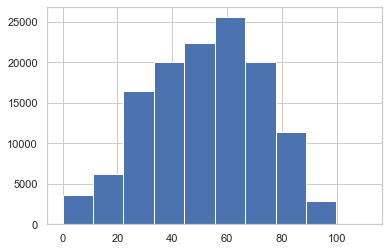

In [17]:
df_main['edad'].hist()
plt.show()

In [18]:
df_main['edad'].describe()

count    128951.000000
mean         52.159192
std          20.452300
min           0.000000
25%          37.000000
50%          54.000000
75%          68.000000
max         111.000000
Name: edad, dtype: float64

In [19]:
counts, bins = np.histogram(df_main['edad'].dropna().values, bins=7)
bins

array([  0.        ,  15.85714286,  31.71428571,  47.57142857,
        63.42857143,  79.28571429,  95.14285714, 111.        ])

In [20]:
rangos_edad = [0, 5, 13, 18, 25, 40, 55, 65, 80, 95, 112]
edad_bins = pd.cut(df_main['edad'], bins=rangos_edad)

edad_bins_count = edad_bins.value_counts()

In [21]:
edad_bins_count

(40, 55]     29650
(65, 80]     26267
(25, 40]     25502
(55, 65]     23408
(80, 95]      9986
(18, 25]      7521
(5, 13]       2218
(13, 18]      1956
(0, 5]        1945
(95, 112]      453
Name: edad, dtype: int64

<AxesSubplot:>

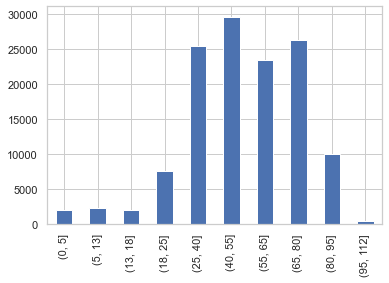

In [22]:
edad_bins_count.sort_index().plot(kind='bar')

In [23]:
df_main['edad_bins'] = edad_bins

In [24]:
# Valores perdidos / missings
df_main['sexo'].isna().sum(), df_main['sexo'].isna().sum() / df_main.shape[0]

(6934, 0.0506552898031939)

In [25]:
df_main['sexo'].value_counts(), df_main['sexo'].value_counts(normalize=True)

(M    69306
 F    60646
 Name: sexo, dtype: int64,
 M    0.53332
 F    0.46668
 Name: sexo, dtype: float64)

In [26]:
conteo_edad_x_sexo = (df_main[['edad_bins', 'sexo']].dropna() # Seleccion de columna y elimino NaNs
                      .groupby(['edad_bins', 'sexo']).size() # Agrupo y cuento las obs. por intervalo de edad y sexo 
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
conteo_edad_x_sexo.head()

,edad_bins,sexo,conteo
0,"(0, 5]",F,856
1,"(0, 5]",M,1089
2,"(5, 13]",F,933
3,"(5, 13]",M,1285
4,"(13, 18]",F,1323


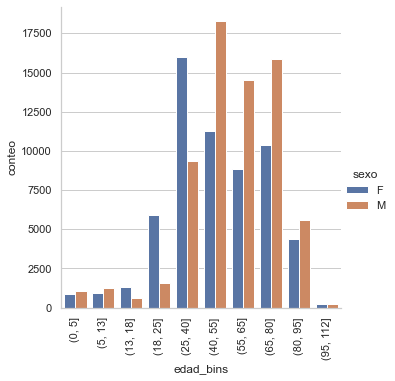

In [27]:
# Gráfica de barras de cantidad de personas por intervalo de edad en cada género
g = sns.catplot(
    data=conteo_edad_x_sexo, kind="bar",
    x="edad_bins", y="conteo", hue="sexo",
)
g.set_xticklabels(rotation=90)
plt.show()